# Olivia Debnath  
### BIH/Charité
### 2025

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams["axes.grid"] = False
sc.settings.set_figure_params(dpi=80, dpi_save=180, vector_friendly=True, transparent=True) #for figures

In [2]:
#Read panNEC anndata (refer to the analysis subfolder to check how the chain integration+clustering+ multi-step annotation was done): 
#Replace with the Zenodo data: 
results= "./pnec_anndata_082023/pNEC_updated_annot_07082023.h5ad"
adata= sc.read_h5ad(results)

#Rename clusters for final figure:
adata.obs['Cell states'] = (adata.obs["Cell states"].map(lambda x: {"Neuroendocrine EEC-like01": "Amphicrine progenitor-like",
                    "Neuroendocrine EEC-like02": "Neuroendocrine",
                    "Neuroendocrine HSP+": "Neuroendocrine HSP+ (hypoxic)"}.get(x, x)).astype("category"))

adata.obs['Cell states'].cat.categories

Index(['Amphicrine acinar01', 'Amphicrine acinar02', 'Amphicrine acinar03',
       'Amphicrine acinar proliferating', 'Amphicrine progenitor-like',
       'Neuroendocrine', 'Neuroendocrine proliferating',
       'Neuroendocrine HSP+ (hypoxic)', 'Neuroendocrine stromal-like',
       'Stroma (normal)', 'Lymphocytes', 'Macrophages'],
      dtype='object')

In [3]:
import matplotlib.font_manager as fm

print([f.name for f in fm.fontManager.ttflist if "Arial" in f.name])

#Arial isn't available => we changed the font type on Adobe Illust. 

[]


In [4]:
#Save original color mapping
original_colors = dict(zip(adata.obs['Cell states'].cat.categories, adata.uns['Cell states_colors']))
original_colors

{'Amphicrine acinar01': '#b3ccff',
 'Amphicrine acinar02': '#cc99ff',
 'Amphicrine acinar03': '#e6ccff',
 'Amphicrine acinar proliferating': '#3973ac',
 'Amphicrine progenitor-like': '#9999ff',
 'Neuroendocrine': '#00cccc',
 'Neuroendocrine proliferating': '#008080',
 'Neuroendocrine HSP+ (hypoxic)': '#004d4d',
 'Neuroendocrine stromal-like': '#4dffb8',
 'Stroma (normal)': '#ff99cc',
 'Lymphocytes': '#ff0000',
 'Macrophages': '#ff704d'}

In [5]:
#Define the new corrected order
desired_order = [
    #Shared
    "Neuroendocrine",
    "Neuroendocrine proliferating",
    "Neuroendocrine HSP+ (hypoxic)",
    "Neuroendocrine stromal-like",

    #Unique
    "Amphicrine acinar01",
    "Amphicrine acinar02",
    "Amphicrine acinar03",
    "Amphicrine acinar proliferating",
    "Amphicrine progenitor-like",

    #TME
    "Stroma (normal)",
    "Lymphocytes",
    "Macrophages"
]

#Ensure 'Cell states' is categorical with the correct order
adata.obs['Cell states'] = pd.Categorical(
    adata.obs['Cell states'],
    categories=desired_order,
    ordered=True
)

#Check if the order is applied
print(adata.obs['Cell states'].cat.categories)

Index(['Neuroendocrine', 'Neuroendocrine proliferating',
       'Neuroendocrine HSP+ (hypoxic)', 'Neuroendocrine stromal-like',
       'Amphicrine acinar01', 'Amphicrine acinar02', 'Amphicrine acinar03',
       'Amphicrine acinar proliferating', 'Amphicrine progenitor-like',
       'Stroma (normal)', 'Lymphocytes', 'Macrophages'],
      dtype='object')


In [6]:
#Restore original colors in the correct order
adata.uns['Cell states_colors'] = [original_colors[cell] for cell in desired_order]


<AxesSubplot:title={'center':'Cell states'}, xlabel='UMAP1', ylabel='UMAP2'>

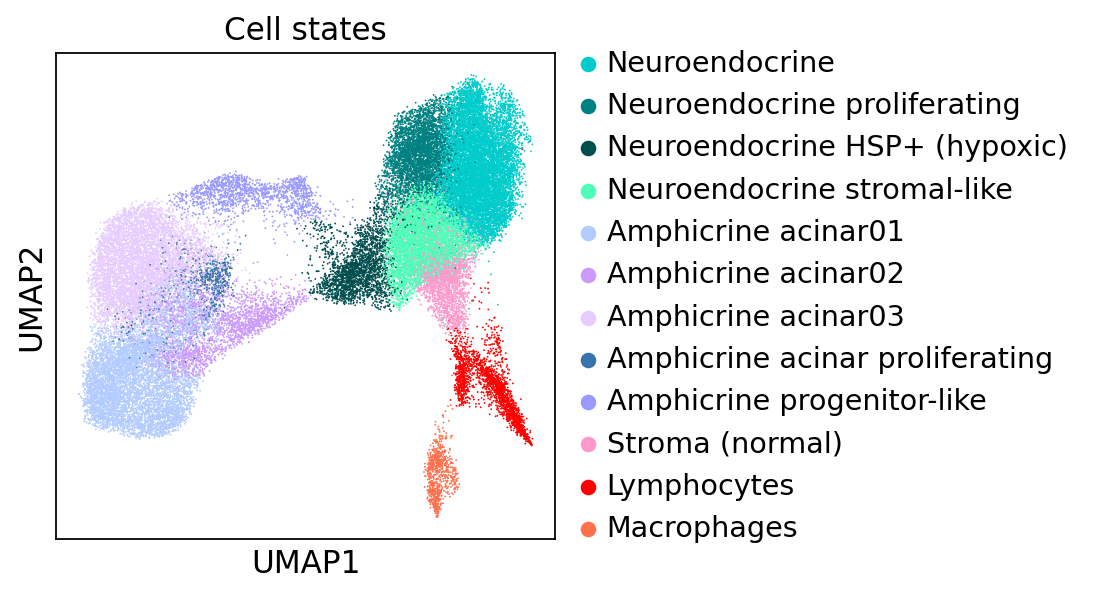

In [7]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(4,4))
sc.pl.umap(adata, color=['Cell states'], ax=ax, show=False)

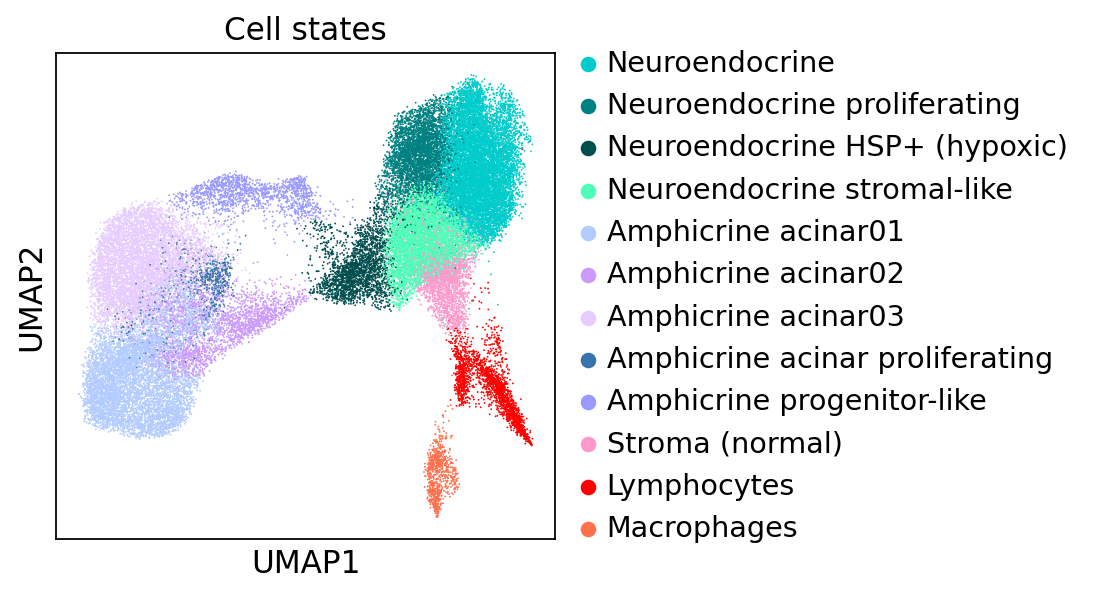

In [8]:
sc.settings.set_figure_params(dpi=80, dpi_save=600, vector_friendly=True, transparent=True) #for figures

#Save the Cell state figure for main 1e (mark the NE, amphicrine, stroma & immune panels manually)
sc.pl.umap(adata, color= ['Cell states'], ncols=1, save= "_Figure1e_CellStates_27022025.pdf")

In [9]:
#We need to first show the UMAP colored by patient samples: 

#Save original colors before renaming
original_colors = dict(zip(adata.obs['PatientID'].cat.categories, adata.uns['PatientID_colors']))

#Define the mapping for renaming
rename_dict = {
    "P07": "P1",
    "P018": "P2",
    "P019": "P3",
    "P021": "P4",
    "P024 (acinar-like)": "P5 (acinar-like)"
} #renamed the original Clinical IDs. 

print(adata.obs['PatientID'].cat.categories)

#Apply renaming to the 'PatientID' column
adata.obs['PatientID'] = adata.obs['PatientID'].replace(rename_dict)
adata.obs['PatientID'] = adata.obs['PatientID'].astype("category")
adata.obs['PatientID'].value_counts()

Index(['P07', 'P018', 'P019', 'P021', 'P024 (acinar-like)'], dtype='object')


P5 (acinar-like)    19497
P1                   8768
P2                   8314
P3                   5580
P4                   2856
Name: PatientID, dtype: int64

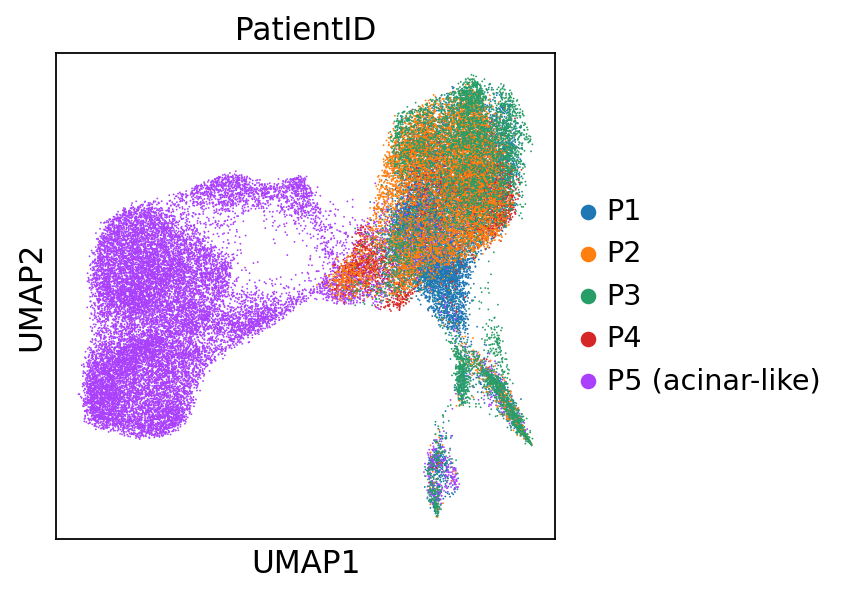

In [10]:
#Reapply original colors (in the correct new order)
adata.uns['PatientID_colors'] = [original_colors[old] for old in rename_dict.keys()]

sc.pl.umap(adata, color= ['PatientID'], ncols=1, save= "_Figure1b_PatientID_27022025.pdf")

In [11]:
adata.obs["cell_type_semifinal_v4"] #semi-refined annotations 

SP084_007_AAACCCAAGACAACTA-1    Lymphocytes (non-tumor)
SP084_007_AAACCCAAGATGATTG-1             GIPR+ EEC like
SP084_007_AAACCCAAGGAGGTTC-1           BRCA1/FANCA_NETp
SP084_007_AAACCCAAGGGTAGCT-1             GIPR+ EEC like
SP084_007_AAACCCAAGGTTAGTA-1    Macrophages (non-tumor)
                                         ...           
SP084_019_TTTGTTGCACTGGATT-1                   Stromal1
SP084_019_TTTGTTGCATCCAACA-1             GIPR+ EEC like
SP084_019_TTTGTTGGTCCAATCA-1             GIPR+ EEC like
SP084_019_TTTGTTGTCCACCCTA-1    Lymphocytes (non-tumor)
SP084_019_TTTGTTGTCGATCCCT-1             GIPR+ EEC like
Name: cell_type_semifinal_v4, Length: 45015, dtype: category
Categories (13, object): ['Acinar_like_NET01', 'Acinar_like_NET02', 'BRCA1/FANCA_NETp', 'BRCA1/FANCA_NETp (acinar like)', ..., 'Macrophages (non-tumor)', 'Smooth muscle like tumors (SMT)', 'Stromal1', 'Stromal2']

In [12]:
#Map the cell types (merge & rename) to reflect the correct annotations: 
#Again, the multi-stepped annotations are part of upstream analysis & are included in the analysis subfolder 
adata.obs['cell_types'] = (adata.obs["cell_type_semifinal_v4"].map(lambda x: {"Acinar_like_NET01": "NE (acinar)",
    "Acinar_like_NET02": "NE (acinar)", "BRCA1/FANCA_NETp": "NE", 
    "BRCA1/FANCA_NETp (acinar like)": "NE (acinar)", 
    "Exo_glandular_mixed01": "NE (acinar)", "Exo_glandular_mixed02": "NE (acinar)",
    "HSPpos_NET": "NE", "GIPR+ EEC like": "NE",
    "Smooth muscle like tumors (SMT)": "Amphicrine progenitor-like", 
    'Stromal1': 'Stromal-like NE', 'Stromal2': 'Stromal (mixed)', 
    "Lymphocytes (non-tumor)": "Immune (non-tumor)", 
    "Macrophages (non-tumor)": "Immune (non-tumor)"}.get(x, x)).astype("category"))

adata.obs['Cell types']= adata.obs['cell_types']
adata.obs['Cell types'].cat.categories

Index(['Amphicrine progenitor-like', 'Immune (non-tumor)', 'NE', 'NE (acinar)',
       'Stromal (mixed)', 'Stromal-like NE'],
      dtype='object')

In [13]:
#Rename: 
adata.obs['Cell types']= (adata.obs["cell_types"].map(lambda x: {"NE": "Neuroendocrine",
            "NE (acinar)": "Amphicrine acinar", "Stromal-like NE": "Neuroendocrine", "Stromal (mixed)": "Stroma (normal)", 
            "Immune (non-tumor)": "Immune"}.get(x, x)).astype("category"))

adata.obs['Cell types']= adata.obs['Cell types'].cat.reorder_categories(['Neuroendocrine', 'Amphicrine progenitor-like', 
                            'Amphicrine acinar',  'Stroma (normal)', 'Immune'])

adata.obs['Cell types'].cat.categories

Index(['Neuroendocrine', 'Amphicrine progenitor-like', 'Amphicrine acinar',
       'Stroma (normal)', 'Immune'],
      dtype='object')

In [14]:
#Normalize the data:
adata_norm= adata.raw.to_adata()

#Normalize total counts to 10,000 per cell
sc.pp.normalize_total(adata_norm, target_sum=1e4)

In [15]:
sc.pp.normalize_total(adata_norm, target_sum=1e4)

#Re-check the total counts per cell after normalization (before log transformation)
total_counts_per_cell = np.sum(adata_norm.X, axis=1)
mean_total_counts = np.mean(total_counts_per_cell)
print(f"Mean total counts per cell after normalization: {mean_total_counts}")

sc.pp.log1p(adata_norm)

Mean total counts per cell after normalization: 10000.0


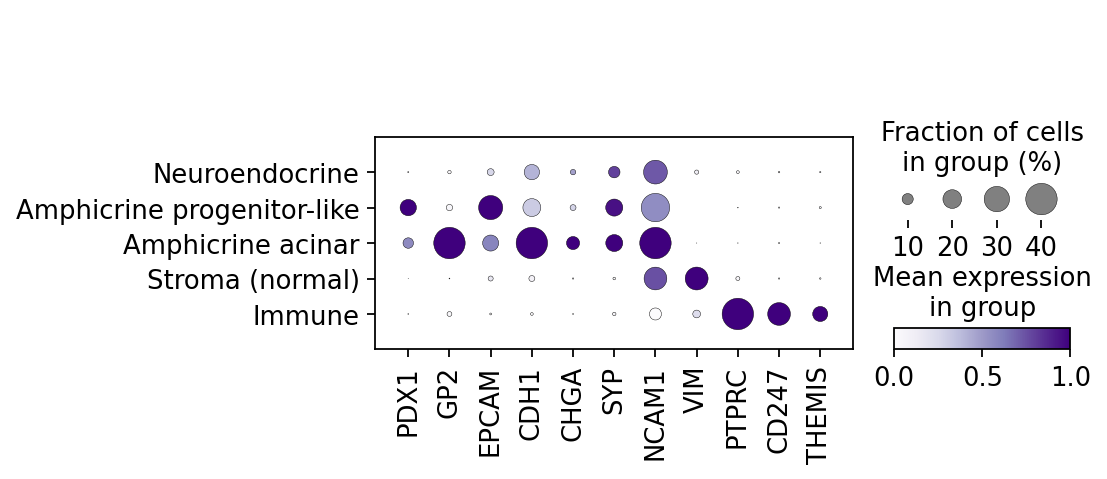

In [16]:
#Refine the colors: 
sc.pl.dotplot(adata_norm, ['PDX1', 'GP2', 'EPCAM', 'CDH1', 'CHGA', 'SYP', 'NCAM1', 
                           'VIM', 'PTPRC', 'CD247', 'THEMIS'], groupby= 'Cell types', swap_axes=False,  
             cmap= "Purples", dot_max=0.4, standard_scale="var", save= "_Figure1E_Celltype_diagnostic_markers.pdf") 

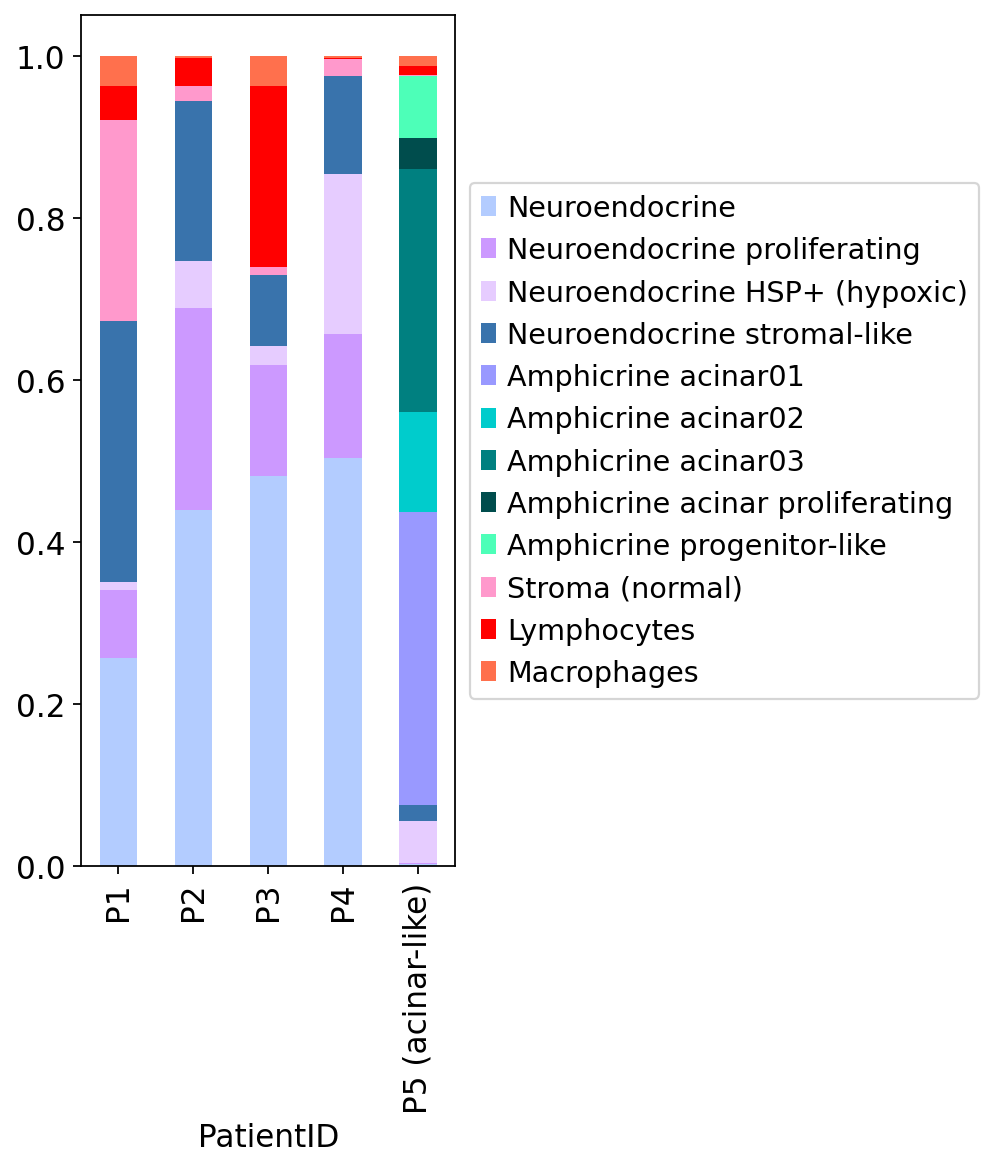

In [17]:
#Cell-state level: 
df= pd.crosstab(adata.obs['PatientID'], adata.obs['Cell states'], normalize= "index")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,7)

pl = df.plot(kind="bar", stacked=True, rot=90, color= ['#b3ccff', '#cc99ff', '#e6ccff', '#3973ac', '#9999ff', '#00cccc',
       '#008080', '#004d4d', '#4dffb8', '#ff99cc', '#ff0000', '#ff704d'])
pl.grid(False)
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Figure1F_CellStates_barplot.pdf')

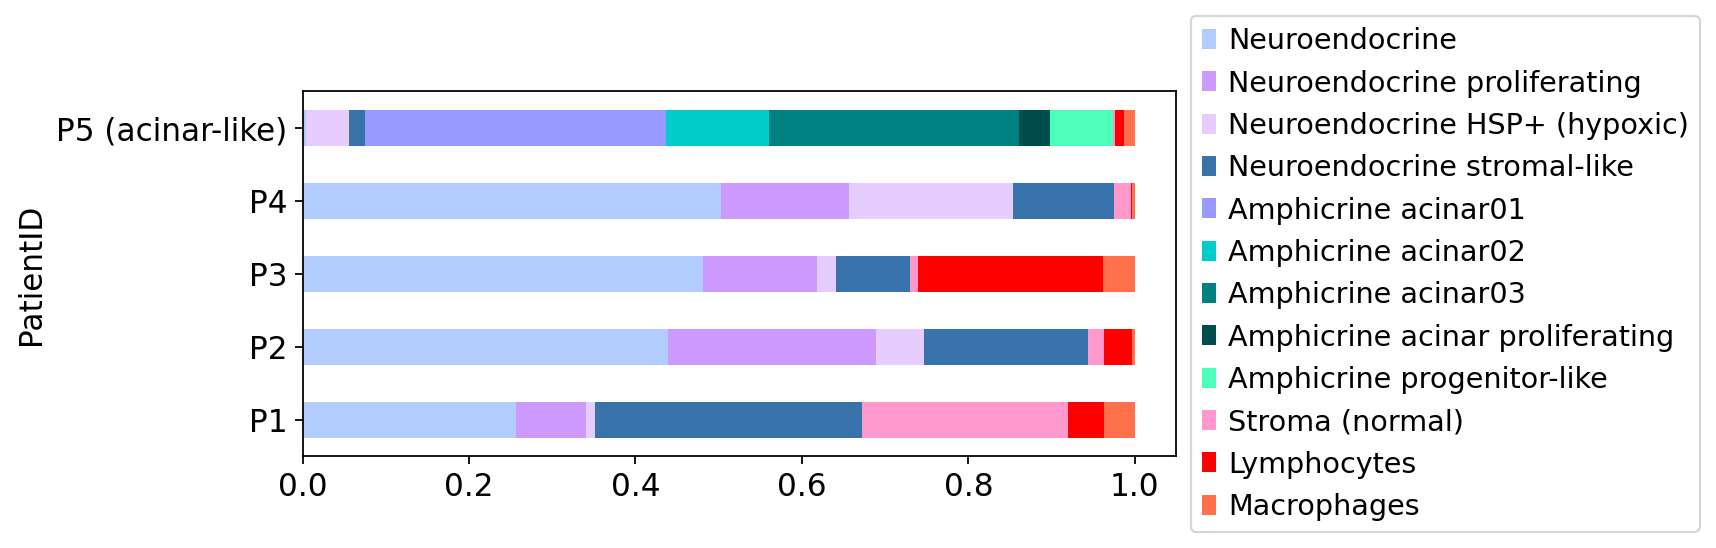

In [18]:
plt.rcParams["figure.figsize"] = (7, 3)

pl = df.plot(kind="barh", stacked=True, color= ['#b3ccff', '#cc99ff', '#e6ccff', '#3973ac', '#9999ff', '#00cccc',
       '#008080', '#004d4d', '#4dffb8', '#ff99cc', '#ff0000', '#ff704d'])
pl.grid(False)
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Figure1F_barplot_horizontal.pdf', dpi=600, bbox_inches="tight")
plt.show()

#Reference: NatureC_figure01_main_30082023.ipynb

In [19]:
#Pathway analysis: reference notebook => NatureC_figure1G_pathways_01092023.ipynb
#Pathway enrichment results are tabulated in Supplementary Table 3 & performed using Metacsape. 

#BRCA1/FANCA NE prol: 
G2M_Checkpoint= ['BARD1', 'CENPF', 'EFNA5', 'EZH2', 'ILF3', 'LMNB1', 'MYBL2', 'NASP', 'POLE', 'PRIM2', 'RBL1', 'STIL', 'NSD2', 'CHAF1A', 'SMC4', 'POLQ', 'NUSAP1', 'KIF15']
E2F_Targets= ['BARD1', 'BRCA1', 'DNMT1', 'EZH2', 'HELLS', 'ILF3', 'LIG1', 'LMNB1', 'MYBL2', 'NASP', 'POLE', 'PRIM2', 'RRM2', 'SMC4', 'CIT', 'ATAD2', 'DIAPH3']
Aurora_Activation= ['PCNT', 'NINL', 'CEP192', 'CDK5RAP2']
DDR= ['BARD1', 'BRCA1', 'EYA2', 'FANCA', 'LIG1', 'POLE', 'NSD2', 'POLQ', 'DTL', 'FANCI', 'RAD18', 'BRIP1', 'RBL1']
Fanconi_anemia_pathway= ['BRCA1','FANCA','FANCI','BRIP1']
RAP1_sig= ['EFNA5', 'IGF1R', 'TIAM1', 'PLCB1']


#Neuroendocrine (ex-GIPR): 
#Dopaminergic/oxytocin & serotonin signaling members are mostly redundant 
Neuronal_system= ['CACNA1A', 'CACNB2', 'KCNJ3', 'KCNJ6', 'PTPRD', 'KCNB2', 'NRXN1', 'EPB41L3', 'PLCB1', 'CACNA2D3', 'DNAJC5', 'CACNA1C', 'KIF5C', 'NOS1AP', 'MLXIPL', 'IGF1R', 'PRKD1']
Dopaminergic_synapse= ['CACNA1A','CACNA1C','KCNJ3','KCNJ6','KIF5C','PLCB1']
Presynaptic_depolarization= ['CACNA1A', 'CACNB2', 'CACNA2D3', 'CACNA1C', 'FGF14', 'EFNA5', 'IGF1R', 'SPTBN4', 'PLCB1']
Potassium_channels= ['KCNJ3','KCNJ6','KCNB2']
Rhoa_REG_pathway= ['ABR', 'ARHGAP6', 'VAV2', 'MCF2L', 'SH3PXD2A', 'GRK5', 'PDE4D', 'DGKD', 'PLCB1']

#HSP+ NE state: 
mTORC_signaling= ['ENO1', 'ACSL3', 'GBE1', 'HSPA4', 'HSPA9', 'HSPD1', 'HSPE1', 'P4HA1', 'PDK1', 'PGK1', 'PLOD2', 'RAB1A', 'TCEA1', 'ACTR3', 'PSMD14', 'CACYBP', 'ERO1A']
Hypoxia= ['ENO1', 'GBE1', 'P4HA1', 'PDK1', 'PGK1', 'TPD52', 'VEGFA', 'AKAP12', 'NDRG1', 'ZNF292', 'ERO1A', 'KDM3A', 'PLOD2', 'PLCG2', 'UBC', 'EIF3E', 'PFKFB4']
Glycolysis= ['ENO1', 'P4HA1', 'PGK1', 'PLOD2', 'VEGFA', 'ZNF292', 'ERO1A']
Heat_stress= ['HSPA1B', 'HSPA4', 'HSPA9', 'HSP90AA1', 'HSP90AB1', 'DNAJB1', 'DNAJB6', 'PTGES3', 'HSPH1', 'ETS2', 'GRB10', 'DNAJC3', 'RHEB', 'UBC', 'VEGFA', 'CUL3', 'PSMD14', 'ERO1A', 'PDIA3', 'RAD23B', 'UBQLN1']
MYC_targets= ['HSP90AB1', 'HSPD1', 'HSPE1', 'IARS1', 'PGK1', 'RAD23B', 'DEK', 'UBA2', 'PSMD14', 'PTGES3']
MAPK_signaling= ['SEPTIN7', 'FOXO1', 'HSPB1', 'DNAJB1', 'MAPK6', 'UBC', 'PSMD14', 'PPP1CB', 'CUL3', 'PLCG2', 'ACTR3']

#Stromal-like NE: 
Hallmark_UV_response_DN= ['PTPRM','MAGI2','AKT3','PDLIM5']
PPI_synapse= ['NRXN3', 'PDLIM5', 'IL1RAPL1']
Phagocytosis= ['PLCG2', 'AKT3', 'ASAP1', 'ARID2', 'PPP1R12B', 'TUSC3', 'BRD4']
Cytokine_signaling= ['NCAM1','PLCG2','RORA','AKT3','IL1RAPL1','ARIH1','PUM1']

#Stromal (normal/admixture): 
Fanconi_Anemia= ['COL1A1', 'COL1A2', 'COL6A3', 'FN1', 'LAMA2', 'LAMA4', 'PDGFRA', 'VCL', 'PDGFC', 'DMD', 'DST', 'P3H2', 'NRP2', 'YAP1', 'FLRT2', 'MAGI2', 'DLG2', 'MAML2', 'PRKG1', 'DOCK4', 'ZFPM2', 'DOCK5', 'ANK2', 'VIM']
NABA_matrisome= ['AEBP1', 'COL1A1', 'COL1A2', 'COL6A3', 'FN1', 'IGFBP7', 'LAMA2', 'LAMA4', 'CRIM1', 'HMCN1']
ALK_signaling= ['FN1', 'VCL', 'PPFIBP1']
PDGF_signaling= ['COL6A3', 'PDGFRA', 'PDGFC']

In [20]:
#Normalize the data:
adata_norm= adata.raw.to_adata()
sc.pp.normalize_total(adata_norm, target_sum=1e4)
sc.pp.log1p(adata_norm)

In [21]:
#Remove the immune cells & subsequently, cells having InferCNV_counts==0 from pNET dataset: 
adata_norm= adata_norm[~adata_norm.obs['cell_states'].isin(['Lymphocytes (non-tumor)', 'Macrophages (non-tumor)'])] 
print(adata_norm.obs['Cell states'].cat.categories)

Index(['Neuroendocrine', 'Neuroendocrine proliferating',
       'Neuroendocrine HSP+ (hypoxic)', 'Neuroendocrine stromal-like',
       'Amphicrine acinar01', 'Amphicrine acinar02', 'Amphicrine acinar03',
       'Amphicrine acinar proliferating', 'Amphicrine progenitor-like',
       'Stroma (normal)'],
      dtype='object')


In [22]:
#Subset to shared clusters:
adata_norm= adata_norm[adata_norm.obs['Cell states'].isin(['Neuroendocrine', 'Neuroendocrine proliferating',
       'Neuroendocrine HSP+ (hypoxic)', 'Neuroendocrine stromal-like', 'Stroma (normal)'])] 

print(adata_norm.obs['Cell states'].value_counts())

Neuroendocrine                   10095
Neuroendocrine stromal-like       5668
Neuroendocrine proliferating      4033
Stroma (normal)                   2465
Neuroendocrine HSP+ (hypoxic)     2275
Name: Cell states, dtype: int64


In [23]:
adata_norm.obs= adata_norm.obs.drop(columns= ['log1p_total_counts_HB_genes', 'pct_counts_HB_genes', 'percent_mt2', 'n_counts', 'percent_Ribo2', 'percent_HB2', 'S_score', 'G2M_score', 'phase', 'XIST-counts', 'res_1', 'res_0.5', 'Cycling (S)', 'Cycling (G2/M)', 'MYC signaling', 'Adhesive', 'Ribosomal', 'Interferon signaling', 'TNF-NFkB signaling', 'Acinar-like', 'Classical-like', 'Basaloid', 'Squamoid', 'Mesenchymal', 'Neuroendocrine-like', 'Neural-like progenitor', 'iPSC', 'NPC', 'fetal replicating', 'fetal quiescent', 'Oligodendrocyte precursors', 'Neurons', 'Astrocytes', 'Oligodendrocytes', 'Microglia', 'Highly-expressed in RB1-loss:', 'Low-expressed in RB1-loss:', 'res_0.8', 'cell_type_semifinal01', 'cell_type_semifinal_v2', 'cell_type_semifinal02', 'res_1.2', 'HSP_response', 'MSigDB_Hallmark_Hypoxia', 'AGE_RAGE_signaling', 'Olinked_glycosylation', 'Stromal_sub', 'cell_type_semifinal_v3', 'cell_type_semifinal_v4', 'Lympho_sub', 'cell_type_semifinal_v5'],
                                   axis=1)

In [24]:
#Compute specific module scores for NE (prol): 
sc.tl.score_genes(adata_norm, G2M_Checkpoint, score_name= "G2M Checkpoint") 
sc.tl.score_genes(adata_norm, E2F_Targets, score_name= "E2F Targets") 
sc.tl.score_genes(adata_norm, Aurora_Activation, score_name= "Aurora Activation") 
sc.tl.score_genes(adata_norm, DDR, score_name= "DNA Damage Response") 
sc.tl.score_genes(adata_norm, RAP1_sig, score_name= "RAP1 Signaling") 
sc.tl.score_genes(adata_norm, Fanconi_anemia_pathway, score_name= "Fanconi anemia pathway") 

#Classical NE cluster: 
#Ca2+/K+ activity can be attributed to sypnatic depolarization. 
sc.tl.score_genes(adata_norm, Neuronal_system, score_name= "Neuronal system") 
sc.tl.score_genes(adata_norm, Dopaminergic_synapse, score_name= "Dopaminergic synapse") 
sc.tl.score_genes(adata_norm, Presynaptic_depolarization, score_name= "Pre-synaptic depolarization") 
sc.tl.score_genes(adata_norm, Rhoa_REG_pathway, score_name= "RHOA REG pathway") 

#HSP+ NE state: 
sc.tl.score_genes(adata_norm, mTORC_signaling, score_name= "mTORC signaling") 
sc.tl.score_genes(adata_norm, Hypoxia, score_name= "Hypoxia") 
sc.tl.score_genes(adata_norm, Glycolysis, score_name= "Glycolysis") 
sc.tl.score_genes(adata_norm, Heat_stress, score_name= "Heat Stress Response") 
sc.tl.score_genes(adata_norm, MYC_targets, score_name= "MYC Targets") 
sc.tl.score_genes(adata_norm, MAPK_signaling, score_name= "MAPK signaling") 

#Stromal-like NE: 
sc.tl.score_genes(adata_norm, PPI_synapse, score_name= "PPI Synapse") 
sc.tl.score_genes(adata_norm, Phagocytosis, score_name= "R-mediated Phagocytosis") 
sc.tl.score_genes(adata_norm, Hallmark_UV_response_DN, score_name= "Hallmark UV response Down") 
sc.tl.score_genes(adata_norm, Cytokine_signaling, score_name= "Cytokine signaling") 

#Stroma (normal): 
sc.tl.score_genes(adata_norm, Fanconi_Anemia, score_name= "Focal Adhesion") 
sc.tl.score_genes(adata_norm, NABA_matrisome, score_name= "NABA Matrisome") 
sc.tl.score_genes(adata_norm, ALK_signaling, score_name= "ALK Signaling") 
sc.tl.score_genes(adata_norm, ALK_signaling, score_name= "PDGF Signaling") 

In [25]:
sc.tl.score_genes(adata_norm, Dopaminergic_synapse, score_name= "Dopaminergic synapse")  #rerun
sc.tl.score_genes(adata_norm, Neuronal_system, score_name= "Neuronal system") 

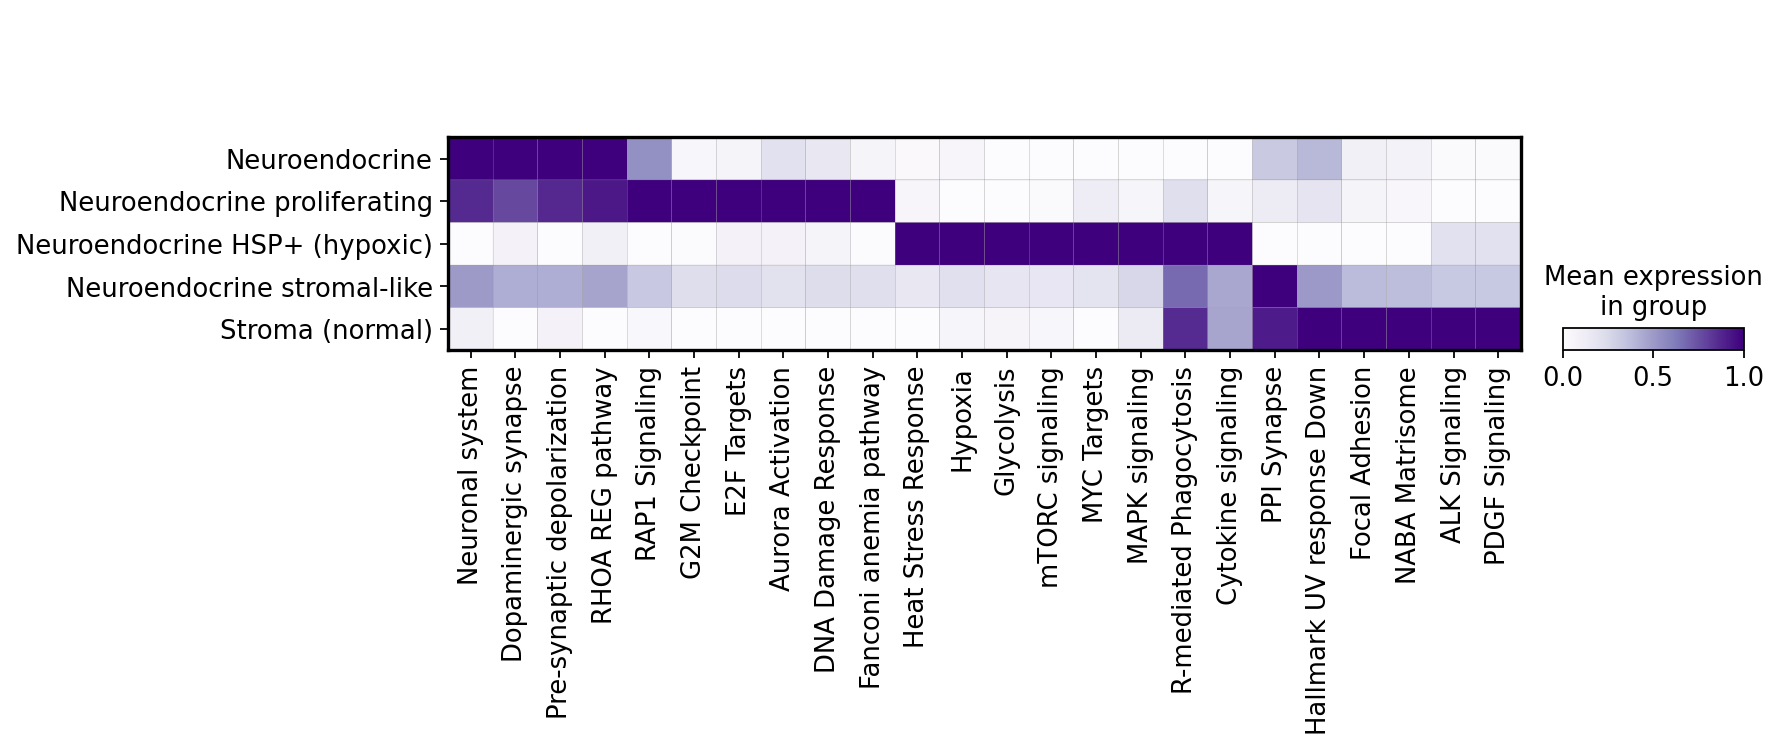

In [26]:
#Put HSP before mTORC signaling:
#RAP1 pathway is shared b/w NE (ex-GIPR) & NE (prol): 
markers = ['Neuronal system', 'Dopaminergic synapse', 'Pre-synaptic depolarization', 'RHOA REG pathway',
          'RAP1 Signaling', 'G2M Checkpoint', 'E2F Targets', 'Aurora Activation', 'DNA Damage Response', 'Fanconi anemia pathway',  
           'Heat Stress Response', 'Hypoxia', 'Glycolysis', 'mTORC signaling', 'MYC Targets', 'MAPK signaling', 
           'R-mediated Phagocytosis', 'Cytokine signaling', 'PPI Synapse', 'Hallmark UV response Down', 
           'Focal Adhesion', 'NABA Matrisome', 'ALK Signaling', 'PDGF Signaling']

sc.pl.matrixplot(adata_norm, markers, groupby= 'Cell states', swap_axes=False,  
             cmap= "Purples", standard_scale="var", dendrogram=False, save= "_Figure1G_pathways_27022025.pdf")